In [3]:
!pip install opencv-python

     |████████████████████████████████| 50.4 MB 13 kB/s  eta 0:00:01


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dog = cv2.imread('dog.jpeg',0)

(-0.5, 274.5, 182.5, -0.5)

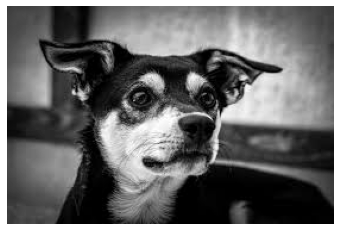

In [3]:
plt.imshow(dog,cmap='gray')
plt.axis('off')

In [4]:
dog.shape

(183, 275)

In [5]:
kl = cv2.imread('kl.jpeg')
kl = cv2.cvtColor(kl, cv2.COLOR_BGR2RGB)

(-0.5, 999.5, 666.5, -0.5)

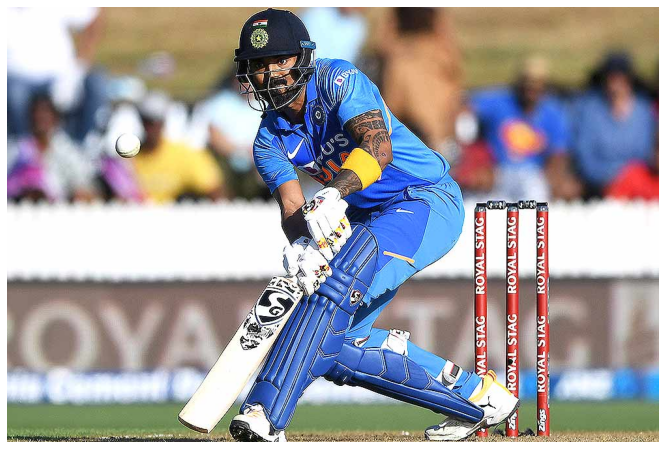

In [6]:
plt.figure(figsize = [12,8])
plt.imshow(kl)
plt.axis('off')

In [7]:
kl.shape

(667, 1000, 3)

In [8]:
def show_channels(img):
    plt.imshow(img)
    plt.title('Original image')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    
    fit,ax = plt.subplots(1,3,figsize = (16,12))
    ax[0].imshow(red_channel,cmap = 'Reds')
    ax[0].set_title('Red Channel')
    ax[1].imshow(green_channel,cmap = 'Greens')
    ax[1].set_title('Green Channel')
    ax[2].imshow(blue_channel,cmap = 'Blues')
    ax[2].set_title('Blue channel')
    for i in range(3):
        ax[i].set_xticks([])
        ax[i].set_yticks([])

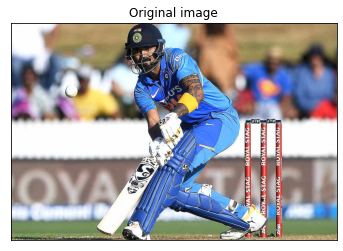

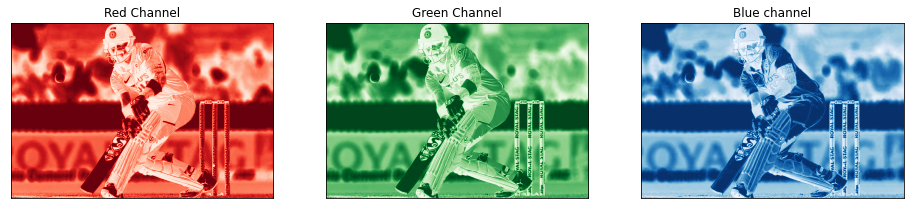

In [9]:
show_channels(kl)

## Histogram of an image

(array([3050., 1197.,  797.,  645.,  487.,  480.,  397.,  359.,  303.,
         290.,  288.,  232.,  267.,  262.,  273.,  262.,  251.,  270.,
         272.,  272.,  242.,  266.,  240.,  232.,  224.,  245.,  197.,
         240.,  225.,  235.,  215.,  184.,  189.,  192.,  170.,  204.,
         195.,  209.,  182.,  180.,  194.,  202.,  257.,  210.,  226.,
         176.,  191.,  198.,  204.,  195.,  241.,  188.,  238.,  215.,
         217.,  237.,  250.,  264.,  269.,  296.,  261.,  257.,  249.,
         274.,  272.,  266.,  288.,  271.,  307.,  295.,  309.,  297.,
         379.,  329.,  312.,  275.,  274.,  290.,  252.,  234.,  223.,
         225.,  210.,  224.,  183.,  229.,  190.,  207.,  202.,  216.,
         208.,  223.,  216.,  215.,  203.,  210.,  232.,  232.,  203.,
         214.,  232.,  171.,  201.,  203.,  197.,  230.,  190.,  199.,
         205.,  209.,  203.,  218.,  220.,  192.,  181.,  203.,  205.,
         209.,  234.,  205.,  199.,  217.,  231.,  195.,  199.,  186.,
      

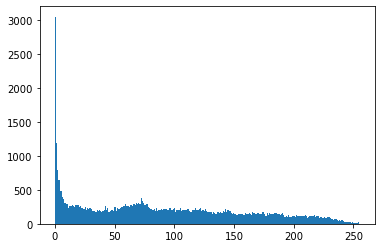

In [11]:
plt.hist(dog.ravel(), bins=256)

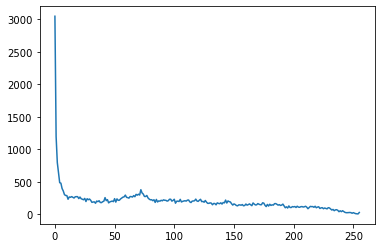

In [12]:
#cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
histg = cv2.calcHist([dog],[0],None,[256],[0,256])  
plt.plot(histg)

# 1. Write a program to perform histogram equalization on a gray scale image.
- Display the original and histogram-equalized images.
- Repeat the experiment for 3 different types (extreme dark, medium dark, and extreme light) of input gray scale images.


In [23]:
equ = cv2.equalizeHist(img) 
  
# stacking images side-by-side 
res = np.hstack((img, equ)) 

NameError: name 'img' is not defined

In [18]:
 def histogram_equalization(img_in):# segregate color streams
    b,g,r = cv2.split(img_in)
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])# calculate cdf    
    cdf_b = np.cumsum(h_b)  
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)
    
    # mask all pixels with value=0 and replace it with mean of the pixel values 
    cdf_m_b = np.ma.masked_equal(cdf_b,0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max()-cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')
  
    cdf_m_g = np.ma.masked_equal(cdf_g,0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max()-cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')
    cdf_m_r = np.ma.masked_equal(cdf_r,0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max()-cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8')# merge the images in the three channels    
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]
  
    img_out = cv2.merge((img_b, img_g, img_r))# validation
    equ_b = cv2.equalizeHist(b)
    equ_g = cv2.equalizeHist(g)
    equ_r = cv2.equalizeHist(r)
    equ = cv2.merge((equ_b, equ_g, equ_r))
    #print(equ)
    #cv2.imwrite('output_name.png', equ)return img_out
    return equ

In [19]:
ans = histogram_equalization(kl)

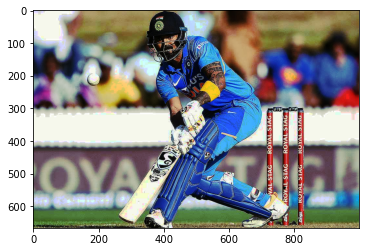

In [20]:
plt.imshow(ans)

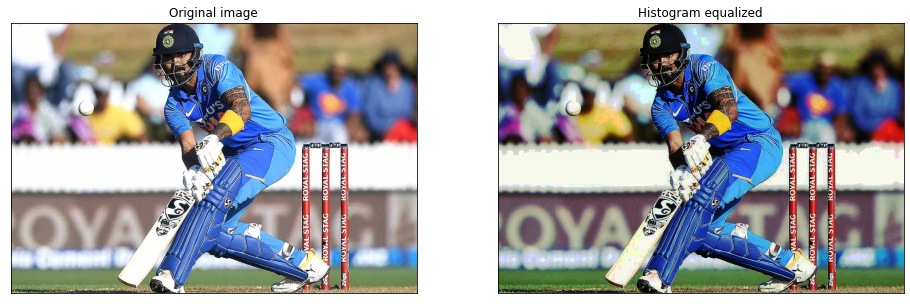

In [22]:
    
fit,ax = plt.subplots(1,2,figsize = (16,12))
ax[0].imshow(kl)
ax[0].set_title('Original image')
ax[1].imshow(ans)
ax[1].set_title('Histogram equalized')
for i in range(2):
    ax[i].set_xticks([])
    ax[i].set_yticks([])